# Ridge Regression 

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
import sklearn.model_selection as skm
(X_train, X_test, y_train, y_test) = skm.train_test_split(data.drop(['log_price','price'], axis=1),
                                                          data['log_price'],
                                                          test_size=0.2,
                                                          random_state=0)

In [169]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from matplotlib.pyplot import subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from ISLP.models import ModelSpec as MS

In [170]:
K=5
kfold = skm.KFold(K, random_state=0, shuffle=True)

In [171]:
X_train = X_train.iloc[:,1:]
X_test = X_test.iloc[:,1:]

In [172]:
lambdas = 10**np.linspace(4, -6, 100) / y_train.std()

ridgeCV = skl.ElasticNetCV(alphas=lambdas, 
                           l1_ratio=0, 
                           cv=kfold)
scaler = StandardScaler(with_mean=True, with_std=True)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipeCV.fit(X_train, y_train)
tuned_ridge = pipeCV.named_steps['ridge']
tuned_ridge.alpha_

0.006210413169280639

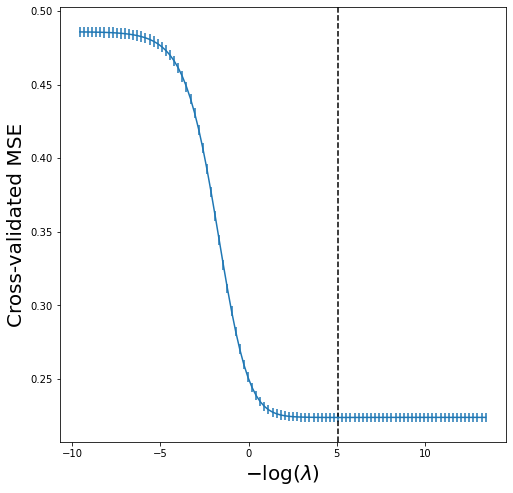

In [177]:
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_ridge.alphas_), tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [173]:
ridge = skl.ElasticNet(alpha=tuned_ridge.alpha_, l1_ratio=0)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)]) 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.006210413169280639, l1_ratio=0))])

In [175]:
test_pred = pipe.predict(X_test)
np.mean((y_test - test_pred)**2)

0.22759993189970487

In [176]:
train_pred = pipe.predict(X_train)
np.mean((y_train - train_pred)**2)

0.22034352737175794